# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

In [3]:
#Convert cities list to panda DaraFrame and add columns to store city info
city_weather = pd.DataFrame({"City":cities})
city_weather["Country"] = ""
city_weather["Latitude"] = ""
city_weather["Longitude"] = ""
city_weather["Date"] = ""
city_weather["Cloudiness"] = ""       
city_weather["Humidity"] = ""
city_weather["Max Temp"] = ""
city_weather["Wind Speed"] = ""
city_weather.head()

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,lata,,,,,,,,
1,avarua,,,,,,,,
2,kaitangata,,,,,,,,
3,rikitea,,,,,,,,
4,ushuaia,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set base url
units = "imperial"
base_url = f"http://api.openweathermap.org/data/2.5/find?&appid={weather_api_key}&units={units}"

print("""
Begnning Data Retrieval:
-------------------------
      """)

#iterate panda DF to request city weather info and store to the dataframe
for index, row in city_weather.iterrows():
    
    print(f"Processing Record {index+1} | {row['City']}")
    
    query_url = f"{base_url}&q={row['City']}"
    response = requests.get(query_url)
    weather_data = response.json()
    
    try:
        row["Country"] = weather_data["list"][0]["sys"]["country"]
        row["Latitude"] = weather_data["list"][0]["coord"]["lat"]
        row["Longitude"] = weather_data["list"][0]["coord"]["lon"]
        row["Date"] = weather_data["list"][0]["dt"]
        row["Cloudiness"] = weather_data["list"][0]["clouds"]["all"]
        row["Humidity"] = weather_data["list"][0]["main"]["humidity"]
        row["Max Temp"] = weather_data["list"][0]["main"]["temp_max"]
        row["Wind Speed"] = weather_data["list"][0]["wind"]["speed"]
    except (IndexError, KeyError):
        print("Missing fields, skipping...")
        city_weather.drop(city_weather.index[index])

print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")


Begnning Data Retrieval:
-------------------------
      
Processing Record 1 | lata
Processing Record 2 | avarua
Processing Record 3 | kaitangata
Processing Record 4 | rikitea
Processing Record 5 | ushuaia
Processing Record 6 | terra santa
Processing Record 7 | mataura
Processing Record 8 | upernavik
Processing Record 9 | praia da vitoria
Processing Record 10 | barrow
Processing Record 11 | hobart
Processing Record 12 | jalu
Processing Record 13 | sur
Processing Record 14 | iqaluit
Processing Record 15 | tuktoyaktuk
Processing Record 16 | portland
Processing Record 17 | kavaratti
Processing Record 18 | kodiak
Processing Record 19 | yeehaw junction
Missing fields, skipping...
Processing Record 20 | baracoa
Processing Record 21 | coquimbo
Processing Record 22 | suraabad
Processing Record 23 | colac
Processing Record 24 | thompson
Processing Record 25 | new norfolk
Processing Record 26 | goderich
Processing Record 27 | butaritari
Processing Record 28 | hithadhoo
Processing Record 29 | s

Processing Record 232 | tateyama
Processing Record 233 | manturovo
Processing Record 234 | ancud
Processing Record 235 | san cristobal
Processing Record 236 | caravelas
Processing Record 237 | miranda de ebro
Processing Record 238 | broome
Processing Record 239 | tungor
Processing Record 240 | koshurnikovo
Processing Record 241 | mubende
Processing Record 242 | constitucion
Processing Record 243 | oussouye
Processing Record 244 | denizli
Processing Record 245 | novopokrovka
Processing Record 246 | ruatoria
Missing fields, skipping...
Processing Record 247 | pratapgarh
Processing Record 248 | camacha
Processing Record 249 | nanortalik
Processing Record 250 | guerrero negro
Processing Record 251 | alad
Processing Record 252 | conceicao do araguaia
Processing Record 253 | ribeira grande
Processing Record 254 | wanning
Processing Record 255 | lagoa
Processing Record 256 | luderitz
Processing Record 257 | higuey
Missing fields, skipping...
Processing Record 258 | plettenberg bay
Processing 

Processing Record 465 | makat
Processing Record 466 | kolarovo
Processing Record 467 | pakxan
Processing Record 468 | northam
Processing Record 469 | aitape
Processing Record 470 | pangnirtung
Processing Record 471 | dinsor
Missing fields, skipping...
Processing Record 472 | gastello
Processing Record 473 | ystad
Processing Record 474 | sebinkarahisar
Processing Record 475 | valparaiso
Processing Record 476 | araioses
Processing Record 477 | maningrida
Processing Record 478 | hirado
Processing Record 479 | kemijarvi
Processing Record 480 | elko
Processing Record 481 | byron bay
Processing Record 482 | atambua
Processing Record 483 | sola
Processing Record 484 | pulandian
Processing Record 485 | darhan
Processing Record 486 | wajima
Processing Record 487 | bundu
Processing Record 488 | asau
Processing Record 489 | valdivia
Processing Record 490 | jumla
Processing Record 491 | warqla
Missing fields, skipping...
Processing Record 492 | corlu
Processing Record 493 | erenhot
Processing Reco

In [5]:
# Replace all blankspace cells with NaN and drop rows with NaN values to get rid of cities with no information found
city_weather = city_weather.replace(r'', np.nan, regex=True)
city_weather = city_weather.dropna()

In [6]:
city_weather.reset_index(drop = True)

,City,Country,Latitude,Longitude,Date,Cloudiness,Humidity,Max Temp,Wind Speed
0,lata,PT,40.1629,-8.3327,1.585239e+09,75.0,67.0,59.00,11.41
1,avarua,CK,-21.2078,-159.7750,1.585239e+09,20.0,94.0,73.40,2.24
2,kaitangata,NZ,-46.2817,169.8464,1.585239e+09,100.0,78.0,48.99,1.99
3,rikitea,PF,-23.1203,-134.9692,1.585239e+09,89.0,88.0,75.33,24.49
4,ushuaia,AR,-54.8000,-68.3000,1.585239e+09,40.0,53.0,51.80,16.11
...,...,...,...,...,...,...,...,...,...
569,lithgow,AU,-33.4833,150.1500,1.585239e+09,75.0,100.0,60.01,2.24
570,curti,IN,15.4167,74.0167,1.585239e+09,20.0,79.0,84.20,6.93
571,lompoc,US,34.6391,-120.4579,1.585239e+09,75.0,81.0,48.99,8.39
572,acarau,BR,-2.8856,-40.1200,1.585239e+09,100.0,65.0,89.37,1.66


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
city_weather.to_csv(output_data_file)

#obtain current date
current_time = datetime.datetime.now()
date = current_time.strftime("%x")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

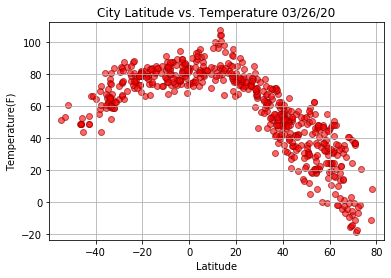

In [31]:
plt.scatter(city_weather["Latitude"].astype(float),city_weather["Max Temp"].astype(float), color = "red", alpha = 0.6,edgecolor = "darkred")

plt.title(f"City Latitude vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid()


plt.xlim(min(city_weather["Latitude"])-5, max(city_weather["Latitude"])+5)
plt.ylim(min(city_weather["Max Temp"])-5, max(city_weather["Max Temp"])+5)

plt.savefig("weather_image/Latitude vs. Temp.png")

plt.show()

From the figure above, there's strong relationship between city latitude and max temperatures. For citities at negative latitude levels, the higher the latitude is, the higher the temperature is; for citities at positive latitude levels, the higher the latitude is, the lower the temperature is.

#### Latitude vs. Humidity Plot

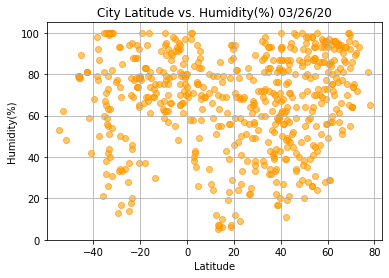

In [32]:
plt.scatter(city_weather["Latitude"].astype(float),city_weather["Humidity"].astype(float), color = "orange", alpha = 0.6, edgecolor = "darkorange")

plt.title(f"City Latitude vs. Humidity(%) {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.xlim(min(city_weather["Latitude"])-5, max(city_weather["Latitude"])+5)
plt.ylim(min(city_weather["Humidity"])-5, max(city_weather["Humidity"])+5)

plt.savefig("weather_image/Latitude vs. Humidity.png")

plt.show()


There's no obvious relationship between city latitude and humidity levels. Most citites in our sample have humidity levels above 40%. 

#### Latitude vs. Cloudiness Plot

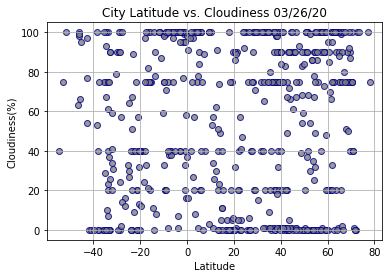

In [33]:
plt.scatter(city_weather["Latitude"].astype(float),city_weather["Cloudiness"].astype(float), color = "grey", alpha = 0.8, edgecolor = "darkblue")

plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.xlim(min(city_weather["Latitude"])-5, max(city_weather["Latitude"])+5)
plt.ylim(min(city_weather["Cloudiness"])-5, max(city_weather["Cloudiness"])+5)

plt.savefig("weather_image/Latitude vs. Cloudiness.png")

plt.show()


There is no relationship between the city latitude and cloudiness levels. The data points are scatter all over the plot. From the plot above, it shows that many citities ranging from various latitude levels have same cloudiness levels.

#### Latitude vs. Wind Speed Plot

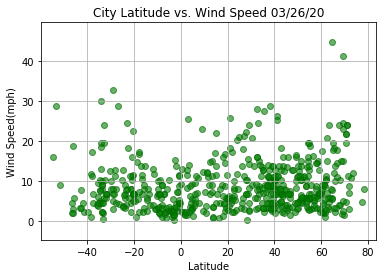

In [34]:
plt.scatter(city_weather["Latitude"].astype(float),city_weather["Wind Speed"].astype(float), color = "green", alpha = 0.6, edgecolor = "darkgreen")

plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid()

plt.xlim(min(city_weather["Latitude"])-5, max(city_weather["Latitude"])+5)
plt.ylim(min(city_weather["Wind Speed"])-5, max(city_weather["Wind Speed"])+5)

plt.savefig('weather_image/Latitude vs. Wind Speed Plot.png')

plt.show()


Most citites have wind speed between 0 to 10 mph in our sample. However, there's no obvious changes to wind speed level along the changes to latitude levels.

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearReg(location, x_para, y_para):
    if location == "Northern":
        x_values = northernHem[x_para]
        y_values = northernHem[y_para]
    elif location == "Southern":
        x_values = southernHem[x_para]
        y_values = southernHem[y_para]
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(min(x_values)+5, min(y_values)+5),fontsize=15,color="red")
    plt.xlabel(x_para)
    plt.ylabel(y_para)
    plt.title(f"City {y_para} vs. {x_para} {date}")

    plt.savefig(f'weather_image/{location} Hemisphere {x_para} vs. {y_para}.png')
    plt.show()


In [36]:
# Create Northern and Southern Hemisphere DataFrames
northernHem = city_weather.loc[(city_weather["Latitude"].astype(float) >= 0)]
southernHem = city_weather.loc[(city_weather["Latitude"].astype(float) < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

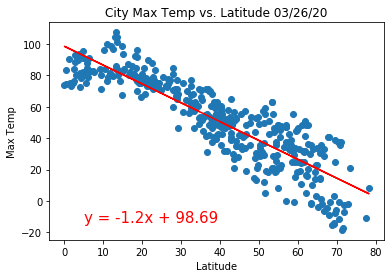

In [37]:
linearReg("Northern", "Latitude", "Max Temp")

There's strong positive relationship in Northern Hemisphere between latitude and max temperatures among sampling cities. The higher the latitude is, the lower the max temperature reaches.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

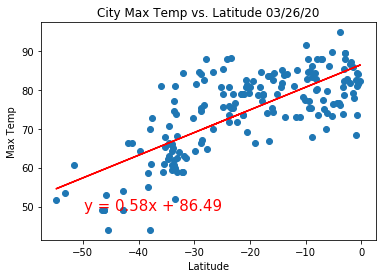

In [38]:
linearReg("Southern", "Latitude", "Max Temp")

There's positive relationship between city latitude and the max temperatures in our sampling cities. In Southern Hemisphere, it appears that the higher the latitude is, the higher the temperature reaches. However, the relationship is not as strong as that in Nothern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

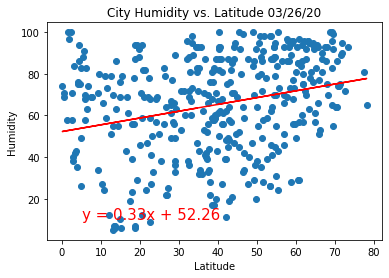

In [39]:
linearReg("Northern", "Latitude", "Humidity")

Although the linear regression model shows a positive relationship betqween the latitude and city humidity among ths sample cities in Nothern Hemisphere, the relationship was not strong. As seen from the scatter plot, the dots are scattered everywhere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

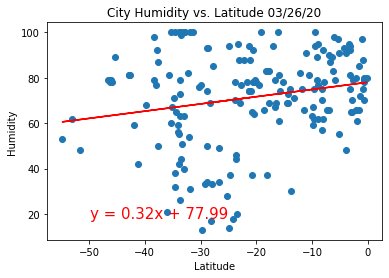

In [40]:
linearReg("Southern", "Latitude", "Humidity")

Same as Nothern Hemisphere above, the relationship between latitude and humidity was not strong. There's to some extend some trend between the two. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

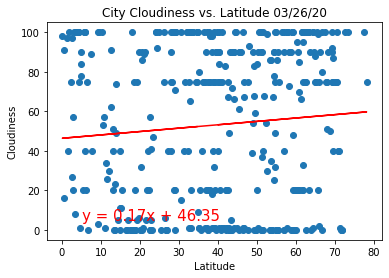

In [41]:
linearReg("Northern", "Latitude", "Cloudiness")

There is no linear regression relationship between the latitude and cloudiness. There's various cloudiness level at same latitude levels. The data points are scatter all over the plot.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

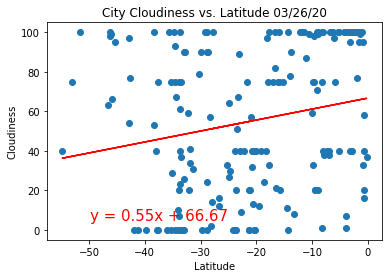

In [42]:
linearReg("Southern", "Latitude", "Cloudiness")

There is no linear regression relationship between the latitude and cloudiness. There's various cloudiness level at same latitude levels. The data points are scatter all over the plot.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

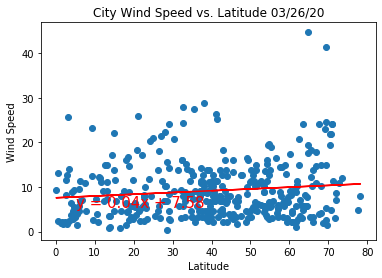

In [43]:
linearReg("Northern", "Latitude", "Wind Speed")

There is no linear regression relationship between the latitude and the wind speed levels. There's various cities at the same latitude level but have different wind speed. Most citites have wind speed below 10 mph with some outliers above 10 mph in Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

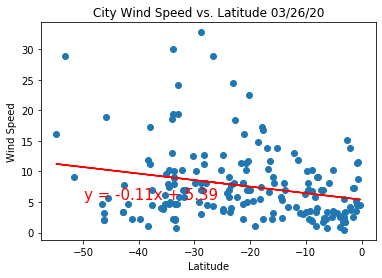

In [44]:
linearReg("Southern", "Latitude", "Wind Speed")

There is no linear regression relationship between the latitude and the wind speed levels. There's various cities at the same latitude level but have different wind speed. Most citites in Southern Hemisphere have wind speed below 6 mph.